<a href="https://colab.research.google.com/github/Alicia-Alexia/7_days_of_code/blob/main/7_days_of_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Célula 1 — Importações

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

📌 Célula 2 — Leitura dos Dados

In [14]:
# URL do parquet de exemplares
url_exemplares = "https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet"
df_exemplares = pd.read_parquet(url_exemplares, engine="pyarrow")

# --- Carregar todos os empréstimos ---
arquivos = [
    "emprestimos-20101.csv","emprestimos-20102.csv",
    "emprestimos-20111.csv","emprestimos-20112.csv",
    "emprestimos-20121.csv","emprestimos-20122.csv",
    "emprestimos-20131.csv","emprestimos-20132.csv",
    "emprestimos-20141.csv","emprestimos-20142.csv",
    "emprestimos-20151.csv","emprestimos-20152.csv",
    "emprestimos-20161.csv","emprestimos-20162.csv",
    "emprestimos-20171.csv","emprestimos-20172.csv",
    "emprestimos-20181.csv","emprestimos-20182.csv",
    "emprestimos-20191.csv","emprestimos-20192.csv",
    "emprestimos-20201.csv"
]
url_base = "https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/"
df = pd.concat([pd.read_csv(url_base + arq).assign(arquivo=arq) for arq in arquivos],
               ignore_index=True)

df.head()


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,arquivo
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,emprestimos-20101.csv
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv


📌 Célula 3 — Limpeza dos Dados

In [15]:
# Remover coluna que não faz sentido
df_exemplares = df_exemplares.drop(columns=['registro_sistema'])

# Converter matrícula para string
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('Int64').astype(str)

# Remover duplicados
df = df.drop_duplicates()
df_exemplares = df_exemplares.drop_duplicates()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2257981 entries, 0 to 2258017
Data columns (total 8 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id_emprestimo         int64 
 1   codigo_barras         object
 2   data_renovacao        object
 3   data_emprestimo       object
 4   data_devolucao        object
 5   matricula_ou_siape    object
 6   tipo_vinculo_usuario  object
 7   arquivo               object
dtypes: int64(1), object(7)
memory usage: 155.0+ MB


📌 Célula 4 — Criar Função de Classificação CDU

In [16]:
def classificar_CDU(cod):
    try:
        if 0 <= cod <= 99:
            return "000-099: Generalidades. Ciência e conhecimento"
        elif 100 <= cod <= 199:
            return "100-199: Filosofia e psicologia"
        elif 200 <= cod <= 299:
            return "200-299: Religião"
        elif 300 <= cod <= 399:
            return "300-399: Ciências sociais"
        elif 400 <= cod <= 499:
            return "400-499: Classe vaga (não ocupada)"
        elif 500 <= cod <= 599:
            return "500-599: Matemática e ciências naturais"
        elif 600 <= cod <= 699:
            return "600-699: Ciências aplicadas"
        elif 700 <= cod <= 799:
            return "700-799: Belas artes"
        elif 800 <= cod <= 899:
            return "800-899: Linguagem. Língua. Linguística"
        elif 900 <= cod <= 999:
            return "900-999: Geografia. Biografia. História"
        else:
            return "Outro / Não classificado"
    except:
        return "Inválido"

df_exemplares['classe_CDU'] = df_exemplares['localizacao'].apply(classificar_CDU)
df_exemplares[['localizacao', 'classe_CDU']].head()


,localizacao,classe_CDU
index,,
0,694,600-699: Ciências aplicadas
1,688,600-699: Ciências aplicadas
2,638,600-699: Ciências aplicadas
3,616,600-699: Ciências aplicadas
5,657,600-699: Ciências aplicadas


📌 Célula 5 — Juntar Dados de Empréstimos + Exemplares

In [17]:
df_merged = df.merge(
    df_exemplares[['codigo_barras','biblioteca','colecao','classe_CDU']],
    on='codigo_barras',
    how='left'
)

df_merged.head()


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,arquivo,biblioteca,colecao,classe_CDU
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114,ALUNO DE PÓS-GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Setorial Prof. Rodolfo Helinski - E...,Acervo Circulante,600-699: Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971,ALUNO DE GRADUAÇÃO,emprestimos-20101.csv,Biblioteca Central Zila Mamede,Acervo Circulante,600-699: Ciências aplicadas


📌 Célula 6 — Análise Exploratória

Top 10 classes CDU mais emprestadas:
classe_CDU
600-699: Ciências aplicadas                       1425473
300-399: Ciências sociais                          369536
500-599: Matemática e ciências naturais             68744
000-099: Generalidades. Ciência e conhecimento      62521
200-299: Religião                                   62295
100-199: Filosofia e psicologia                     60563
900-999: Geografia. Biografia. História              7989
700-799: Belas artes                                 7911
800-899: Linguagem. Língua. Linguística              7490
Name: count, dtype: int64


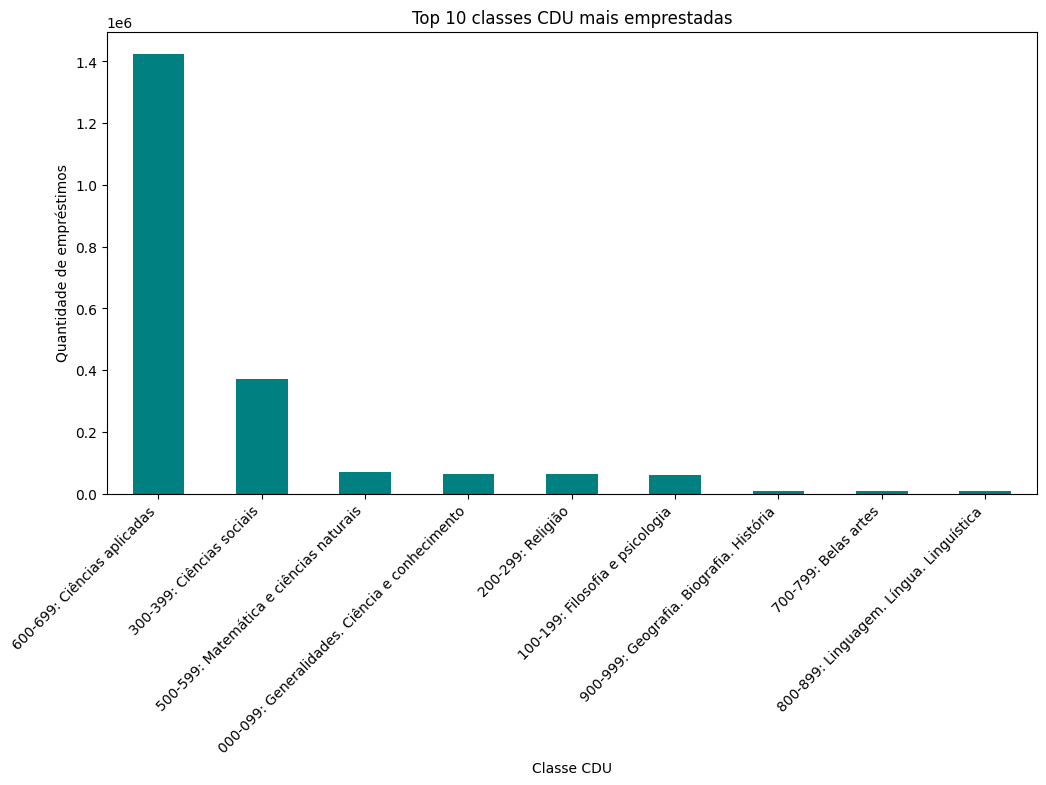

In [18]:
# Top 10 classes da CDU mais emprestadas
top_cdu = df_merged['classe_CDU'].value_counts().head(10)
print("Top 10 classes CDU mais emprestadas:")
print(top_cdu)

# Visualização
plt.figure(figsize=(12,6))
top_cdu.plot(kind='bar', color='teal')
plt.title("Top 10 classes CDU mais emprestadas")
plt.xlabel("Classe CDU")
plt.ylabel("Quantidade de empréstimos")
plt.xticks(rotation=45, ha='right')
plt.show()
